2.  Тензоры tf.constant и tf.Variable. Индексирование и изменение формы  

In [20]:

pip

Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import numpy as np

5. Строим градиентные алгоритмы оптимизации Adam, RMSProp, Adagrad, Adadelta

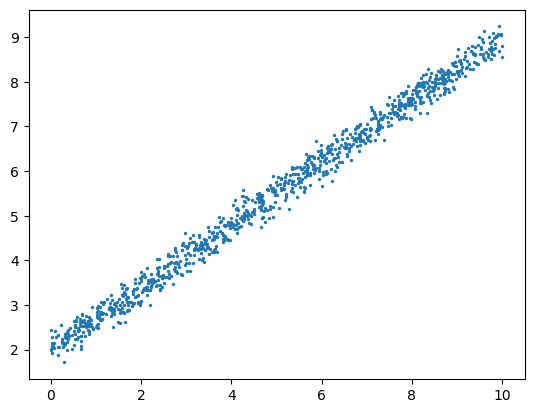

In [15]:
TOTAL_POINTS = 1000

x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = k_true * x + b_true + noise

plt.scatter(x, y, s=2)
plt.show()


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan>


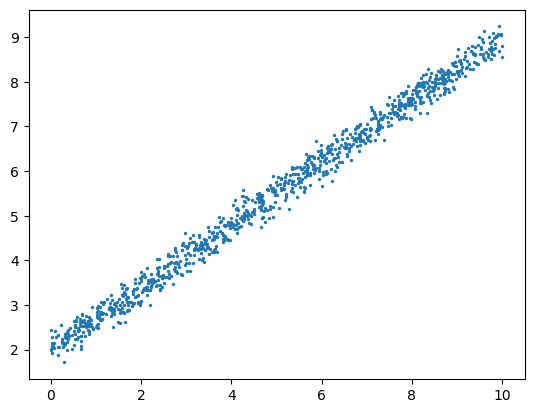

In [22]:
#Градиентный спуск
k = tf.Variable(0.0)
b = tf.Variable(0.0)
learning_rate = 0.2
EPOCHS = 500
for n in range(EPOCHS):
    with tf.GradientTape() as t:
        f = k * x + b
        loss = tf.reduce_mean(tf.square(y - f))
        
    dk, db = t.gradient(loss, [k, b])

    k.assign_sub(learning_rate * dk)
    b.assign_sub(learning_rate * db)

print(k, b, sep='\n')

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7030442>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9942244>


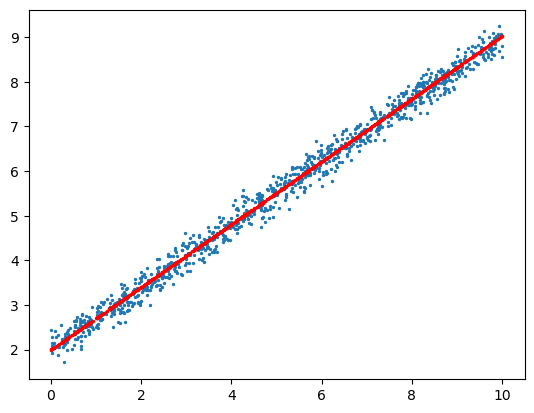

In [23]:
#Стохастический градиентный спуск
k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])
    
        k.assign_sub(learning_rate * dk)
        b.assign_sub(learning_rate * db)

print(k, b, sep='\n')

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7030442>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9942244>


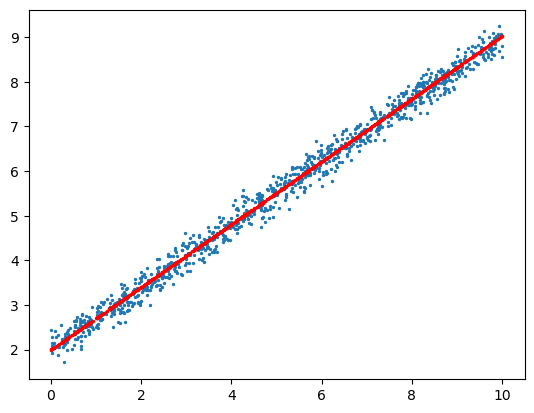

In [27]:
#Встроенный стохастических градиентный спуск
opt = tf.optimizers.SGD(learning_rate=0.02)

k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
        # k.assign_sub(learning_rate * dk)
        # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7050423>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9939424>


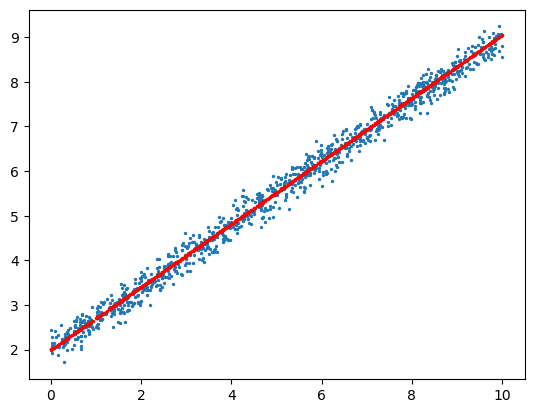

In [28]:
#Встроенный стохастических градиентный спуск (метод моментов)
opt = tf.optimizers.SGD(learning_rate=0.02, momentum=0.5)

k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
        # k.assign_sub(learning_rate * dk)
        # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')

y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

In [29]:
#Встроенный стохастических градиентный спуск (метод моментов) и (метод Нестерова)
opt = tf.optimizers.SGD(learning_rate=0.02, momentum=0.5, nesterov=True)

k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
        # k.assign_sub(learning_rate * dk)
        # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')



<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6971213>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9939551>


In [30]:
#Встроенный стохастических градиентный спуск (Adagrad)
opt = tf.optimizers.Adagrad(learning_rate=0.2)

k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
        # k.assign_sub(learning_rate * dk)
        # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')



<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7013826>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9939944>


In [31]:
#Встроенный стохастических градиентный спуск (Adadelta)
opt = tf.optimizers.Adadelta(learning_rate=0.2)

k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
        # k.assign_sub(learning_rate * dk)
        # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')



<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7529095>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.6588887>


In [33]:
#Встроенный стохастических градиентный спуск (RMSProp)
opt = tf.optimizers.RMSprop(learning_rate=0.2)

k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
        # k.assign_sub(learning_rate * dk)
        # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')



<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6091713>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9078246>


In [ ]:
#Встроенный стохастических градиентный спуск (Adam)
opt = tf.optimizers.Adam(learning_rate=0.2)

k = tf.Variable(0.0)
b = tf.Variable(0.0)

learning_rate = 0.02
EPOCHS = 500

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
            
        dk, db = t.gradient(loss, [k, b])

        opt.apply_gradients(zip([dk, db], [k, b]))
        # k.assign_sub(learning_rate * dk)
        # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')



Делаем модель с помощью класса tf.Module. Пример обучения простой нейросети

In [8]:
class DenseNN(tf.Module):
    def __init__(self, outputs):
        super().__init__()
        self.outputs = outputs
        self.fl_init = False


    def __call__(self, x):
        if not self.fl_init:
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name='w')
            self.b = tf.zeros([self.outputs], dtype=tf.float32, name='b')

            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)

            self.fl_init = True

        y = x @ self.w + self.b
        return y

model = DenseNN(1)

x_train = tf.random.uniform(minval=0, maxval=10, shape=(100,2))
y_train = [a + b for a, b in x_train]

loss = lambda x, y: tf.reduce_mean(tf.square(x - y))
opt = tf.optimizers.Adam(learning_rate=0.01)


EPOCHS = 50
for n in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.expand_dims(x, axis=0)
        y = tf.constant(y, shape=(1, 1))

        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))

        grads = tape.gradient(f_loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

    print(f_loss.numpy())

print(model.trainable_variables)

14.782483
0.4694072
0.001740034
0.014860211
0.014954761
0.013843774
0.012621341
0.011340962
0.010040935
0.008756548
0.0075212666
0.00636205
0.0052988217
0.0043446757
0.0035070456
0.0027870534
0.0021810236
0.0016814211
0.0012780903
0.0009585858
0.0007102962
0.00052073045
0.0003783098
0.0002728009
0.00019557128
0.00013957337
9.93381e-05
7.04793e-05
4.984432e-05
3.510774e-05
2.4564368e-05
1.70048e-05
1.1591419e-05
7.744096e-06
5.0440804e-06
3.1838144e-06
1.9413355e-06
1.1367993e-06
6.356422e-07
3.4287586e-07
1.7607817e-07
8.6839464e-08
4.1262865e-08
1.8598257e-08
8.036295e-09
3.3842298e-09
1.3833414e-09
5.684342e-10
2.0463631e-10
5.820766e-11
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.503259e-05], dtype=float32)>, <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.99999857],
       [0.99999785]], dtype=float32)>)


Делаем модель нейросети для распознавания рукописных цифр 

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 256
x_test = x_test / 256

x_train = tf.reshape(tf.cast(x_train, tf.float32), [-1, 28*28])
x_test = tf.reshape(tf.cast(x_test, tf.float32), [-1, 28*28])

y_train = to_categorical(y_train, 10)


class DenseNN(tf.Module):
    def __init__(self, outputs, activate='relu'):
        super().__init__()
        self.outputs = outputs
        self.activate = activate
        self.fl_init = False

    def __call__(self, x):
        if not self.fl_init:
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name='w')
            self.b = tf.zeros([self.outputs], dtype=tf.float32, name='b')

            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)

            self.fl_init = True

        y = x @ self.w + self.b

        if self.activate == 'relu':
            return tf.nn.relu(y)
        elif self.activate == 'softmax':
            return tf.nn.softmax(y)

        return y

layer_1 = DenseNN(120)
layer_2 = DenseNN(10, activate='softmax')


def model_predict(x):
    y = layer_1(x)
    y = layer_2(y)
    return y


cross_entropy = lambda y_true, y_pred: tf.reduce_mean(tf.losses.categorical_crossentropy(y_true, y_pred))
opt = tf.optimizers.Adam(learning_rate=0.001)

BATCH_SIZE = 32
EPOCHS = 10
TOTAL = x_train.shape[0]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

for n in range(EPOCHS):
    loss = 0
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            f_loss = cross_entropy(y_batch, model_predict(x_batch))
    
        loss += f_loss
        grads = tape.gradient(f_loss, [layer_1.trainable_variables, layer_2.trainable_variables])
        opt.apply_gradients(zip(grads[0], layer_1.trainable_variables))
       # opt.apply_gradients(zip(grads[1], layer_2.trainable_variables))

    print(loss.numpy())


y = model_predict(x_test)
y2 = tf.argmax(y, axis=1).numpy()
acc = len(y_test[y_test == y2]) / y_test.shape[0] * 100

print(acc)

638.5866


KeyboardInterrupt: 

Декоратор tf.function для ускорения выполнения функций. Графы - это описание процесса решения с помощью последовательных операций
Преимущества графов:
1) Статические вычисления выполняеются один раз и затем многократно используются
2) Независимые вычиления разделяются между потоками и устройствами (например, графическими процессорами)
3) Общие арифмитические операции выполняются только один раз

In [9]:
@tf.function
def train_batch(x_batch, y_batch):
    with tf.GradientTape() as tape:
        f_loss = cross_entropy(y_batch, model(x_batch))

    grads = tape.gradient(f_loss, model.trainable_variables)
    opt.apply_gradients(zip(grads, model.trainable_variables))

    return f_loss


for i in range(EPOCHS):
    loss = 0
    for x_batch, y_batch in train_dataset:
        loss += train_batch(x_batch, y_batch)

    print(loss.numpy())

ValueError: in user code:

    File "C:\Users\kiryu\AppData\Local\Temp\ipykernel_8460\417954584.py", line 4, in train_batch  *
        f_loss = cross_entropy(y_batch, model(x_batch))
    File "C:\Users\kiryu\AppData\Local\Temp\ipykernel_8460\1697333718.py", line 18, in __call__  *
        y = x @ self.w + self.b

    ValueError: Dimensions must be equal, but are 784 and 2 for '{{node matmul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](x_batch, matmul/ReadVariableOp)' with input shapes: [32,784], [2,1].


In [11]:
import time

def function_tf(x, y):
    s = tf.zeros_like(x, dtype=tf.float32)
    s = s + tf.matmul(x, y)
    for n in range(10):
        s = s + tf.matmul(s, y) * x

    return s

def test_function(fn):
    def wrapper(*args, **kwargs):
        start = time.time()
        fn(*args, **kwargs)
        dt = time.time() - start
        print(f"Время обработки: {dt} сек")
    return wrapper


SIZE = 1000
x = tf.ones((SIZE, SIZE), dtype=tf.float32)
y = tf.ones_like(x, dtype=tf.float32)


function_tf_graph = tf.function(function_tf)
test_function(function_tf)(x, y)
for _ in range(2):
    test_function(function_tf_graph)(x, y)

1) Тестируйте результаты вызова функций на графах (сравнить со значениями при стандартном вызове функции)
2) Создавайте переменные tf.Variable вне функции, то же самое и с другими изменяемыми объектами, такими как keras.layers, keras.Model, tf.optiimizers и т.п.
3) Не следует в графовых функциях использовать глобальные переменные языка Python (исключение tf.Variable)
4) используйте в функциях преимущественно объекты Tensorflow
5) Для макс. роста производительности в tf.function следует включать как можно больший объём вычислений.

9. Введение в модели и слои бэкэнда Keras

In [56]:
class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, units=1):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                initializer='random_normal',
                                trainable=True)

        self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)

    def call(self, inputs):
        regular = tf.reduce_mean(tf.square(self.w))
        self.add_loss(regular)
        return tf.matmul(inputs, self.w) + self.b

In [4]:
layer1 = DenseLayer(10)
y = layer1(tf.constant([[1., 2., 3.]]))

In [5]:
print(y)

tf.Tensor(
[[-0.19372508 -0.21674068 -0.03520676 -0.22846244  0.20298685  0.1699853
  -0.29950356 -0.39891768  0.2517586  -0.27031153]], shape=(1, 10), dtype=float32)


tf.keras.layers.Layer

layer1.weights - тензор, содержащий все веса слоя

layer1.trainable_weights - тензор, содержащий все обучаемые веса слоя

layer1.non_trainable_variables - тензор, содержащий все необучаемые веса слоя

In [12]:
class NeuralNetwork(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.layer1 = DenseLayer(128)
        self.layer2 = DenseLayer(10)

    def call(self, inputs):
        x = self.layer1(inputs)
        x = tf.nn.relu(x)
        x = self.layer2(x)
        x = tf.nn.softmax(x)
        return x



In [13]:
model = NeuralNetwork()
y = model.call(tf.constant([[1., 2., 3.]]))

In [14]:
print(y)

tf.Tensor(
[[0.09096365 0.09266415 0.09011258 0.11173508 0.10684003 0.09915838
  0.09962897 0.10089903 0.1006225  0.10737557]], shape=(1, 10), dtype=float32)


Класс tf.keras.Model

1. обучать (метод fit())
2. сохранять и загрудать веса (методы save(), save_weights(), load_weights())
3. оценивать и прогнозировать выходные значения (методы evaluate(), predict())

In [53]:
class NeuralNetwork(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.layer1 = DenseLayer(128)
        self.layer2 = DenseLayer(10)

    def call(self, inputs):
        x = self.layer1(inputs)
        x = tf.nn.relu(x)
        x = self.layer2(x)
        x = tf.nn.softmax(x)
        return x



In [54]:
model = NeuralNetwork()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
             loss=tf.losses.categorical_crossentropy,
             metrics=['accuracy'])

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 256
x_test = x_test / 256

x_train = tf.reshape(tf.cast(x_train, tf.float32), [-1, 28*28])
x_test = tf.reshape(tf.cast(x_test, tf.float32), [-1, 28*28])

y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model.fit(x_train, y_train, batch_size=32, epochs=5)
print(model.evaluate(x_test, y_test_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8609 - loss: 0.4969
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9616 - loss: 0.1346
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9735 - loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0467
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0915
[0.07763028889894485, 0.9758999943733215]


10. Keras - последовательная модель Sequential 

Dense - полносвязный слой

Conv1D, Conv2D, Conv3D - свёрточные слои

Conv2DTranspose, Conv3DTranspose - транспонированные свёрточные слои

SimpleRNN, LSTM, GRU - рекурентные слои

MaxPooling2D, Dropout, BatchNormalization - вспомогательные слои

Model - общий класс модели

Sequential - последовательная модель

In [57]:
from tensorflow.keras.layers import  Dense, Input
from tensorflow import keras

In [58]:
model = keras.Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model.pop()

<Dense name=dense_1, built=False>

In [59]:
model.add(Dense(5, activation='linear'))

In [61]:
print(model.layers)

[<Dense name=dense, built=False>, <Dense name=dense_2, built=False>]


In [62]:
model.layers[0].weights

[]

In [64]:
x = tf.random.uniform((1, 20), 0, 1)
y = model(x)


In [67]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (1, 128)               │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 5)                 │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,333 (13.02 KB)

 Trainable params: 3,333 (13.02 KB)

 Non-trainable params: 0 (0.00 B)

None


Слой input

In [79]:
model = keras.Sequential([
   # Input(shape=(20,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

AttributeError: Sequential model 'sequential_4' has no defined inputs yet.

In [81]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 256
x_teat = x_test / 256

x_train = tf.reshape(tf.cast(x_train, tf.float32), [-1, 28*28])
x_test = tf.reshape(tf.cast(x_test, tf.float32), [-1, 28*28])

y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [82]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8762 - loss: 0.4341
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9643 - loss: 0.1218
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9766 - loss: 0.0798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0444


Один вход и 2 выхода

In [83]:
model_ex = keras.Model(inputs=model.inputs,
                      outputs=[layer.output for layer in model.layers])

In [84]:
x = tf.expand_dims(x_test[0], axis=0)
y = model_ex(x)
y2 = model(x)
print(y, y2, sep="\n\n")

[<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[   0.      ,    0.      ,  438.78925 ,    0.      ,    0.      ,
           0.      ,  386.61218 ,  545.4363  ,  125.37852 ,    0.      ,
           0.      ,  128.3094  ,    0.      ,  271.0271  ,    0.      ,
         113.74172 ,    0.      ,  702.1752  ,   34.404865,  234.39293 ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
         220.77101 ,  599.4542  ,    0.      ,    0.      ,  670.8796  ,
           0.      ,  329.18268 ,    0.      ,  367.31592 ,    0.      ,
         802.8733  ,  742.888   ,    0.      ,  166.74052 ,  117.21456 ,
           0.      ,    0.      ,    0.      ,    0.      ,   29.65043 ,
           0.      ,    0.      ,  238.28313 ,    0.      ,  794.4805  ,
        1109.0538  , 1224.3217  ,    0.      ,    0.      , 1023.3118  ,
           0.      ,   75.43241 ,    0.      ,    0.      ,    0.      ,
          67.186646,  438.06985 ,  587.8002  ,    0.      ,  828.31885 ,


D:\Anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_14']. Received: the structure of inputs=*
  warnings.warn(


model.layers[0].trainable=False

11. Keras - введение в функциональное API

In [9]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [10]:
tf.random.set_seed(1)
input = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax')(x)


model = keras.Model(inputs=input, outputs=output)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 825,034 (3.15 MB)

 Trainable params: 825,034 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 256
x_test = x_test / 256

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)
print(model.evaluate(x_test, y_test))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.3456 - loss: 1.7719 - val_accuracy: 0.5675 - val_loss: 1.2338
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.5489 - loss: 1.2637 - val_accuracy: 0.6195 - val_loss: 1.0860
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.6061 - loss: 1.1075 - val_accuracy: 0.6541 - val_loss: 0.9916
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6479 - loss: 1.0043 - val_accuracy: 0.6506 - val_loss: 0.9812
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.6714 - loss: 0.9356 - val_accuracy: 0.6871 - val_loss: 0.9034
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6958 - loss: 0.8704 - val_accuracy: 0.6879 - val_loss: 0.8948
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7128 - loss: 0.8135 - val_accuracy: 0.6993 - val_loss: 0.8720
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7294 - loss: 0.7647 - 

In [14]:
class TFConv2D(tf.Module):
    def __init__(self, kernel=(3, 3), channels=1, strides=(2, 2), padding="SAME", activate='relu'):
        super().__init__()
        self.kernel = kernel
        self.channels = channels
        self.strides = strides
        self.padding = padding
        self.activate = activate
        self.fl_init = False

    def __call__(self, x):
        if not self.fl_init:
            self.w = tf.random.truncated_normal((*self.kernel, x.shape[-1], self.channels), stddev=0.1, dtype=tf.double)
            self.b = tf.zeros([self.channels], dtype=tf.double)

            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)

        y = tf.nn.conv2d(x, self.w, strides=(1, *self.strides, 1), padding=self.padding) + self.b

        if self.activate == 'relu':
            return tf.nn.relu(y)
        elif self.activate == 'softmax':
            return tf.nn.softmax(y)
        return y

In [15]:
layer1 = TFConv2D((3, 3), 32)
y = layer1(tf.expand_dims(x_test[0], axis=0))
print(y.shape)

(1, 16, 16, 32)


In [16]:
y = tf.nn.max_pool2d(y, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding="SAME")
print(y.shape)

(1, 8, 8, 32)


In [17]:
enc_input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(enc_input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
enc_output = layers.Dense(8, activation='linear')(x)


encoder = keras.Model(inputs=enc_input, outputs=enc_output, name='encoder')

In [18]:
dec_input = layers.Input(shape=(8,), name='encoded_img')
x = layers.Dense(7 * 7 * 8, activation='relu')(dec_input)
x = layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, 5, strides=(2, 2), activation='linear', padding='same')(x)
x = layers.BatchNormalization()(x)
dec_output = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

decoder = keras.Model(inputs=dec_input, outputs=dec_output, name='decoder')




In [19]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencoder = keras.Model(inputs=autoencoder_input, outputs=autoencoder_output, name='autoencoder')

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train, batch_size=28, epochs=1)

2143/2143 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - loss: 0.0327


In [24]:
h = encoder.predict(tf.expand_dims(x_test[0], axis=0))
img = decoder.predict(h)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


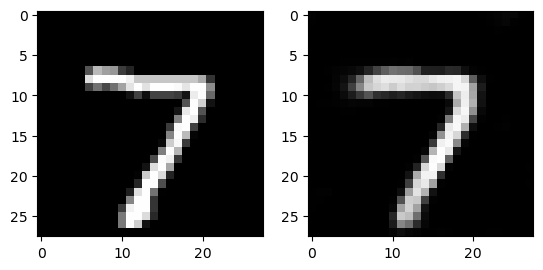

In [27]:
plt.subplot(121)
plt.imshow(x_test[0], cmap='gray')
plt.subplot(122)
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

12. ResNet - революция глубокого обучения. Исчезающие и взрывающиеся градиенты

13. Создаем ResNet подобную архитектуру для классификации изображений CIFAR-10

In [29]:
tf.random.set_seed(1)

In [30]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test /255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [31]:
inputs = keras.Input(shape=(32,32,3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])
x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

print(model.evaluate(x_test, y_test))

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 133ms/step - accuracy: 0.2213 - loss: 1.9863 - val_accuracy: 0.3955 - val_loss: 1.5622
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.4669 - loss: 1.4305 - val_accuracy: 0.5659 - val_loss: 1.2130
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.5737 - loss: 1.1753 - val_accuracy: 0.6274 - val_loss: 1.0279
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.6364 - loss: 1.0119 - val_accuracy: 0.6545 - val_loss: 0.9615
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 162ms/step - accuracy: 0.6783 - loss: 0.9047 - val_accuracy: 0.6839 - val_loss: 0.8854
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.7057 - loss: 0.8288 - val_accuracy: 0.7084 - val_loss: 0.8253
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 177ms/step - accuracy: 0.7325 - loss: 0.7531 - val_accuracy: 0.7223 - val_loss: 0.7906
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 148ms/step - accuracy: 0.7558 - loss

14. Тонкая настройка и контроль процесса обучения через метод fit() 

In [6]:
tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

y_train = keras.utils.to_categorical(y_train, 10) #приведение к виду в one-hot-
y_test = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8630 - loss: 0.4782
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9648 - loss: 0.1172
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9759 - loss: 0.0788
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9816 - loss: 0.0600
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9861 - loss: 0.0451


In [7]:
tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

y_train = keras.utils.to_categorical(y_train, 10) #приведение к виду в one-hot-
y_test = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8297 - loss: 0.5998 - val_accuracy: 0.9450 - val_loss: 0.1823
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9549 - loss: 0.1504 - val_accuracy: 0.9595 - val_loss: 0.1389
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9712 - loss: 0.0990 - val_accuracy: 0.9654 - val_loss: 0.1189
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9796 - loss: 0.0716 - val_accuracy: 0.9679 - val_loss: 0.1102
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0533 - val_accuracy: 0.9687 - val_loss: 0.1092


In [13]:
tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

y_train = keras.utils.to_categorical(y_train, 10) #приведение к виду в one-hot-
y_test = keras.utils.to_categorical(y_test, 10)
validation_split = 0.2
validation_split_index = np.ceil(x_train.shape[0] * validation_split).astype('int32')

#выборка валидации
x_train_val = x_train[:validation_split_index]
y_train_val = y_train[:validation_split_index]

#обучающая выборка 
x_train_data = x_train[validation_split_index:]
y_train_data = y_train[validation_split_index:]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_data, y_train_data))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

train_dataset_val = tf.data.Dataset.from_tensor_slices((x_train_val, y_train_val))
train_dataset_val = train_dataset_val.shuffle(buffer_size=1024).batch(64)

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_dataset, epochs=5, validation_data=train_dataset_val)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8289 - loss: 0.5730 - val_accuracy: 0.9528 - val_loss: 0.1582
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9590 - loss: 0.1401 - val_accuracy: 0.9624 - val_loss: 0.1242
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9730 - loss: 0.0900 - val_accuracy: 0.9646 - val_loss: 0.1135
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9804 - loss: 0.0652 - val_accuracy: 0.9711 - val_loss: 0.0979
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9849 - loss: 0.0492 - val_accuracy: 0.9737 - val_loss: 0.0955


In [14]:
tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

y_train = keras.utils.to_categorical(y_train, 10) #приведение к виду в one-hot-
y_test = keras.utils.to_categorical(y_test, 10)
validation_split = 0.2
validation_split_index = np.ceil(x_train.shape[0] * validation_split).astype('int32')

#выборка валидации
x_train_val = x_train[:validation_split_index]
y_train_val = y_train[:validation_split_index]

#обучающая выборка 
x_train_data = x_train[validation_split_index:]
y_train_data = y_train[validation_split_index:]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_data, y_train_data))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

train_dataset_val = tf.data.Dataset.from_tensor_slices((x_train_val, y_train_val))
train_dataset_val = train_dataset_val.shuffle(buffer_size=1024).batch(64)

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_dataset, epochs=5, validation_data=train_dataset_val, validation_steps=5)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8418 - loss: 0.5574 - val_accuracy: 0.9469 - val_loss: 0.1730
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9580 - loss: 0.1439 - val_accuracy: 0.9500 - val_loss: 0.1834
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 0.0955 - val_accuracy: 0.9688 - val_loss: 0.1104
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9795 - loss: 0.0680 - val_accuracy: 0.9750 - val_loss: 0.1154
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9842 - loss: 0.0502 - val_accuracy: 0.9656 - val_loss: 0.1383


In [35]:
tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
print('x_train', x_train.shape)
print('y_train', y_train.shape)

y_train = keras.utils.to_categorical(y_train, 10) #приведение к виду в one-hot-
y_test = keras.utils.to_categorical(y_test, 10)
validation_split = 0.2
validation_split_index = np.ceil(x_train.shape[0] * validation_split).astype('int32')

#выборка валидации
x_train_val = x_train[:validation_split_index]
y_train_val = y_train[:validation_split_index]

#обучающая выборка 
x_train_data = x_train[validation_split_index:]
y_train_data = y_train[validation_split_index:]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_data, y_train_data))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

train_dataset_val = tf.data.Dataset.from_tensor_slices((x_train_val, y_train_val))
train_dataset_val = train_dataset_val.shuffle(buffer_size=1024).batch(64)

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
class_weight = {
    0:1.0,
    1:1.0,
    2:1.0,
    3:1.0,
    4:1.0,
    5:1.0,
    6:1.0,
    7:1.0,
    8:1.0,
    9:1.0
}
model.fit(train_dataset, epochs=5, validation_data=train_dataset_val, validation_steps=5, class_weight=class_weight)

x_train (60000, 28, 28)
y_train (60000,)
Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("Cast:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 784), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
  • training=True
  • mask=None

In [17]:
class DigitsLimit(keras.utils.Sequence):
    def __init__(self, x, y, batch_size, max_len = -1):
        self.batch_size = batch_size
        self.x = x[:max_len]
        self.y = y[:max_len]

    def __len__(self):
        return int(np.ceil(self.x.shape[0] / self.batch_size))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return batch_x, batch_y

sequence = DigitsLimit(x_train, y_train, 64, 10000)
history = model.fit(x_train, y_train, epochs=3, validation_split=0.2)
print(history.history)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9749 - loss: 0.0769 - val_accuracy: 0.9861 - val_loss: 0.0438
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0435 - val_accuracy: 0.9850 - val_loss: 0.0488
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0323 - val_accuracy: 0.9812 - val_loss: 0.0648
{'accuracy': [0.9764999747276306, 0.9866041541099548, 0.9908958077430725], 'loss': [0.07371532917022705, 0.04364288970828056, 0.030598854646086693], 'val_accuracy': [0.9860833287239075, 0.9850000143051147, 0.981249988079071], 'val_loss': [0.043815430253744125, 0.04878584295511246, 0.06480719149112701]}


15. Тонкая настройка обучения моделей через метод compile()

Некоторые встроенные оптимизаторы:

SGD - стохастический градиентный спуск (с моментами, в том числе и Нестерова)

RMSprop - оптимизатор RMSprop

Adam - оптимизатор Adam

Adadelta - оптимизатор Adadelta

Adagrad - оптимизатор Adagrad

Предопределённые классы для потерь:

BinaryCrossentropy - бинарная кросс-энтропия

CategoricalCrossentropy - категориальная кросс-энтропия

KLDivergence - дивергенция Кульюака-Лейблера

MeanSuaredError - средний квадрат ошибки

MeanAbsoluteError - средняя абсолютная ошибка

Предопределённые метрики:

Accuracy 

BinaryAccuracy

CategoricalAccuracy

In [18]:
#Объявление собсвенной функции потерь 1
def myloss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [19]:
#Объявление собсвенной функции потерь 2
class MyLoss(keras.losses.Loss):
    def __init__(self, alpha=1.0, beta=1.0):
        super().__init__()
        self.alpha = alpha
        self.beta = beta

    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(self.alpha * y_true - self.beta * y_pred))

In [22]:
class CategoricalTruepositives(keras.metrics.Metric):
    def __init__(self, name="my_metric"):
        super().__init__(name=name)
        self.true_positives = self.add_weight(name='acc', initializer="zeros")
        self.count = tf.Variable(0.0)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        y_true = tf.reshape(tf.argmax(y_true, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, "int32") == tf.cast(y_pred, "int32")

        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, "float32")
            values = tf.multiply(values, sample_weight)

        values = tf.cast(values, "float32")

        self.true_positives.assign_add(tf.reduce_mean(values))
        self.count.assign_add(1.0)

    def result(self):
        return self.true_positives / self.count
        
    def rest_states(self):
        self.true_positive.assign(0.0)
        self.count.assign(0.0)
        

In [24]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.81),
             loss=MyLoss(0.5, 2.0),
             metrics=[keras.metrics.CategoricalAccuracy(), CategoricalTruepositives()])

In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - categorical_accuracy: 0.0932 - loss: 0.4064 - my_metric: 0.0932
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.0893 - loss: 0.4071 - my_metric: 0.0274
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.0893 - loss: 0.4071 - my_metric: 0.0169
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.0893 - loss: 0.4071 - my_metric: 0.0122
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.0893 - loss: 0.4071 - my_metric: 0.0096


In [38]:
enc_input = keras.layers.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(32, 3, activation="relu")(enc_input)
x = keras.layers.MaxPooling2D(2, padding='same')(x)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
x = keras.layers.MaxPooling2D(2, padding='same')(x)
x = keras.layers.Flatten()(x)
hidden_output = keras.layers.Dense(8, activation='linear')(x)

x = keras.layers.Dense(7 * 7 * 8, activation='relu')(hidden_output)
x = keras.layers.Reshape((7, 7, 8))(x)
x = keras.layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2DTranspose(32, 5, strides=(2, 2), activation='linear', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
dec_output = keras.layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='dec_output')(x)

x2 = keras.layers.Dense(128, activation='relu')(hidden_output)
class_output = keras.layers.Dense(10, activation='softmax', name='class_output')(x2)

In [39]:
model = keras.Model(enc_input, [dec_output, class_output])

In [43]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss={
                 'dec_output': "mean_squared_error",
                 'class_output': 'categorical_crossentropy'
             },
             metrics={
                 'dec_output': None,
                 'class_output': 'acc'
             })

model.fit(x_train, [x_train, y_train], epochs=1)
#model.fit(x_train, {'dec_output':x_train, 'class_output':y_train}, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 44ms/step - class_output_acc: 0.6487 - class_output_loss: 0.0492 - dec_output_loss: 8.9477 - loss: 8.9969


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
[7]


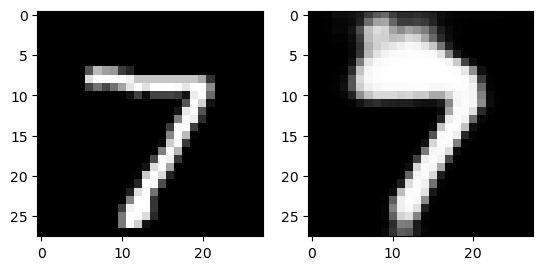

In [44]:
p = model.predict(tf.expand_dims(x_test[0], axis=0))

print(tf.argmax(p[1], axis=1).numpy())

plt.subplot(121)
plt.imshow(x_test[0], cmap='gray')
plt.subplot(122)
plt.imshow(p[0].squeeze(), cmap='gray')
plt.show()